In [1]:
import pandas as pd
import numpy as np

In [2]:

diabetes = pd.read_csv(r'C:\Users\Himanshu Negi\dbms\diabetes_prediction_dataset.csv')
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
diab_num = diabetes[['age','bmi','HbA1c_level','blood_glucose_level']]
diab_num.describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


In [5]:
def get_unique_values(dataframe,col_list):
    for col in col_list:
        print('Column:',col)
        print('Unique values:',dataframe[col].unique())
        print('\n')

In [6]:
get_unique_values(diabetes,['gender','hypertension','heart_disease','smoking_history','diabetes'])


Column: gender
Unique values: ['Female' 'Male' 'Other']


Column: hypertension
Unique values: [0 1]


Column: heart_disease
Unique values: [1 0]


Column: smoking_history
Unique values: ['never' 'No Info' 'current' 'former' 'ever' 'not current']


Column: diabetes
Unique values: [0 1]




In [7]:
def get_value_counts(dataframe,col_list):
    for col in col_list:
        print(dataframe[col].value_counts())
        print('\n')
get_value_counts(diabetes,['gender','hypertension','heart_disease','smoking_history','diabetes'])

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


hypertension
0    92515
1     7485
Name: count, dtype: int64


heart_disease
0    96058
1     3942
Name: count, dtype: int64


smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


diabetes
0    91500
1     8500
Name: count, dtype: int64




In [8]:
diabetes = diabetes[diabetes.gender != 'Other']
diabetes.gender.value_counts()

gender
Female    58552
Male      41430
Name: count, dtype: int64

In [9]:
diabetes.shape

(99982, 9)

In [10]:
d_eda = diabetes.copy()

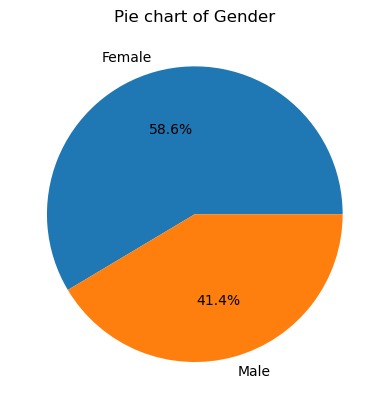

In [11]:
import matplotlib.pyplot as plt

plt.pie(d_eda['gender'].value_counts(),labels=d_eda['gender'].value_counts().index,autopct='%1.1f%%')
plt.title('Pie chart of Gender')
plt.show()

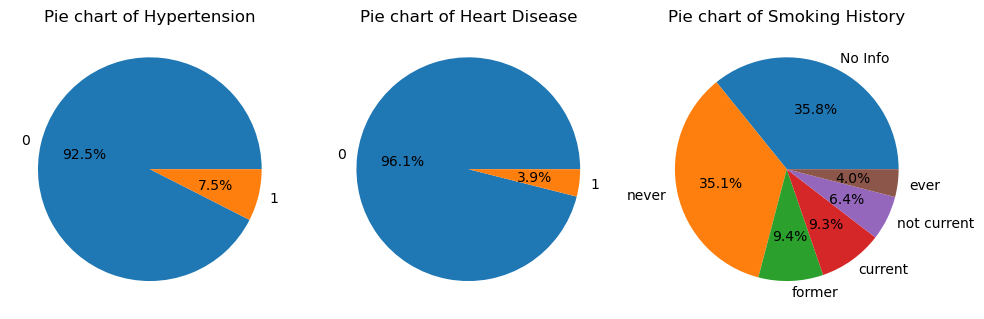

In [12]:
fig,axes = plt.subplots(1,3,figsize=(10,8))
axes[0].pie(d_eda['hypertension'].value_counts(),labels=d_eda['hypertension'].value_counts().index,autopct='%1.1f%%')
axes[0].set_title('Pie chart of Hypertension')
axes[1].pie(d_eda['heart_disease'].value_counts(),labels=d_eda['heart_disease'].value_counts().index,autopct='%1.1f%%')
axes[1].set_title('Pie chart of Heart Disease')
axes[2].pie(d_eda['smoking_history'].value_counts(),labels=d_eda['smoking_history'].value_counts().index,autopct='%1.1f%%')
axes[2].set_title('Pie chart of Smoking History')
plt.tight_layout()
plt.show()

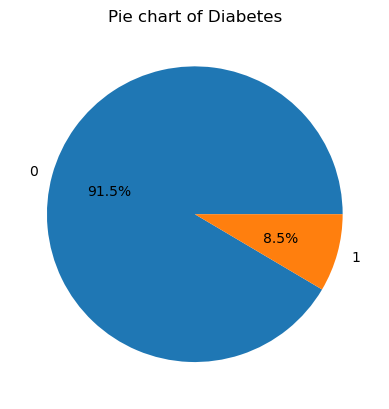

In [13]:
plt.pie(d_eda['diabetes'].value_counts(),labels=d_eda['diabetes'].value_counts().index,autopct='%1.1f%%')
plt.title('Pie chart of Diabetes')
plt.show()

c:\Users\Himanshu Negi\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Himanshu Negi\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Himanshu Negi\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Himanshu Negi\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

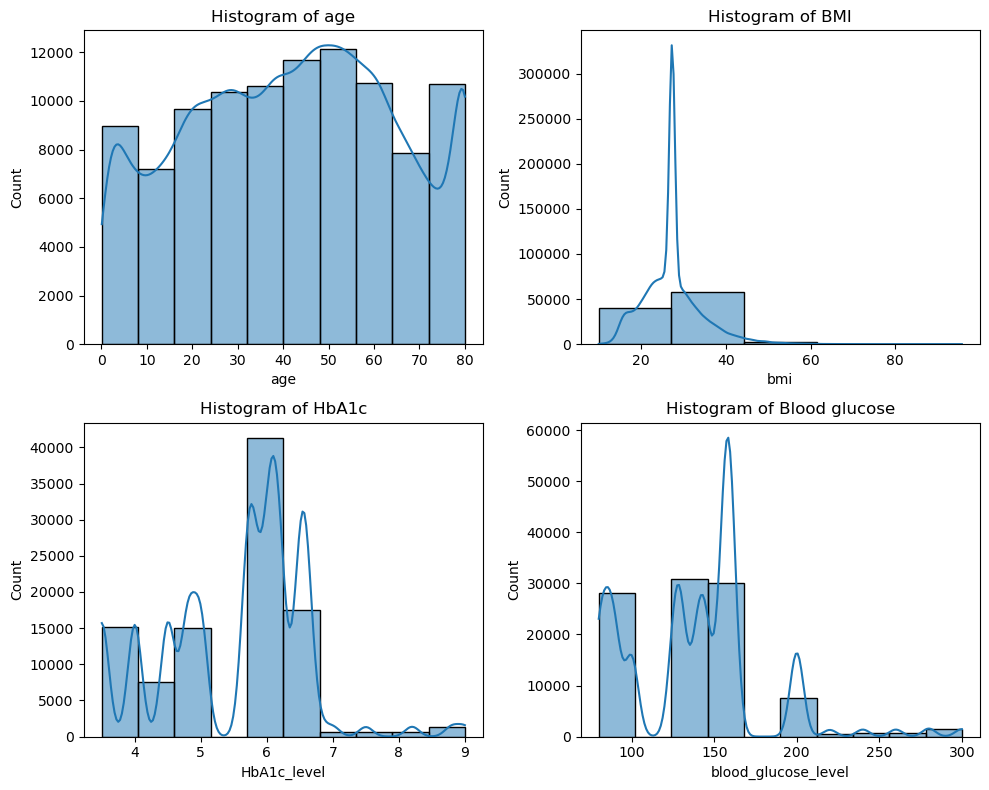

In [14]:
import seaborn as sns

fig,axes = plt.subplots(2,2,figsize=(10,8))
sns.histplot(d_eda['age'],bins=10,kde=True,ax=axes[0,0])
axes[0,0].set_title('Histogram of age')
sns.histplot(d_eda['bmi'],bins=5,kde=True,ax=axes[0,1])
axes[0,1].set_title('Histogram of BMI')
sns.histplot(d_eda['HbA1c_level'],bins=10,kde=True,ax=axes[1,0])
axes[1,0].set_title('Histogram of HbA1c')
sns.histplot(d_eda['blood_glucose_level'],bins=10,kde=True,ax=axes[1,1])
axes[1,1].set_title('Histogram of Blood glucose')
plt.tight_layout()
plt.show()

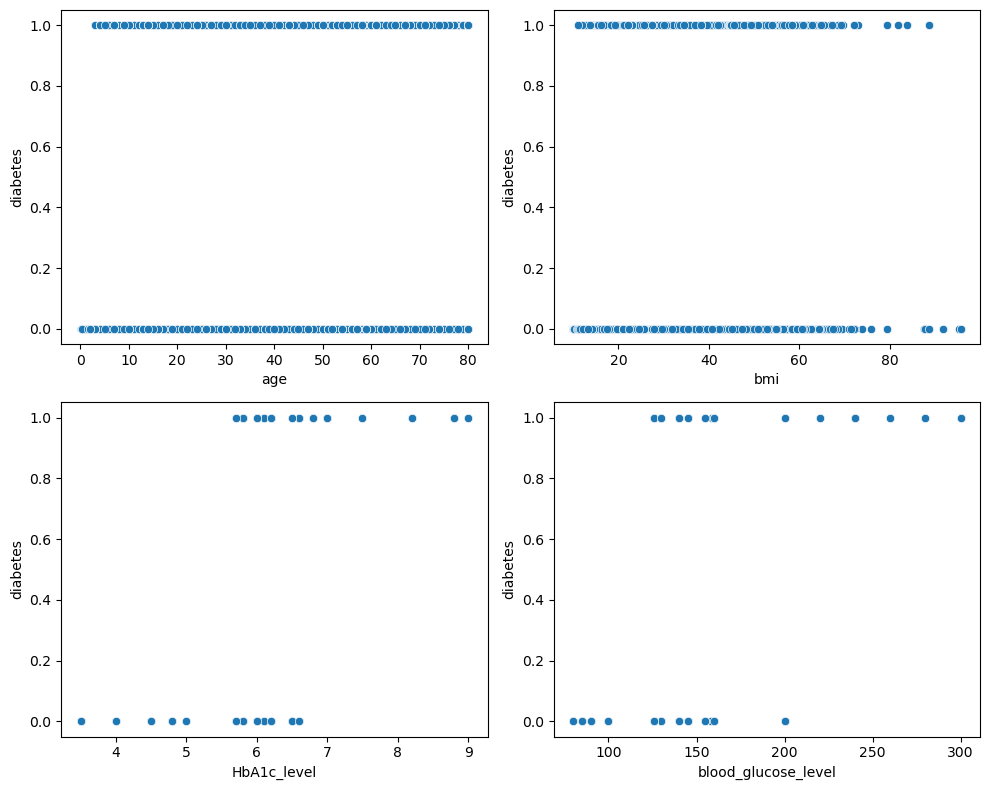

In [15]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
sns.scatterplot(data=d_eda,x='age',y='diabetes',ax=axes[0,0])
sns.scatterplot(data=d_eda,x='bmi',y='diabetes',ax=axes[0,1])
sns.scatterplot(data=d_eda,x='HbA1c_level',y='diabetes',ax=axes[1,0])
sns.scatterplot(data=d_eda,x='blood_glucose_level',y='diabetes',ax=axes[1,1])
plt.tight_layout()
plt.show()

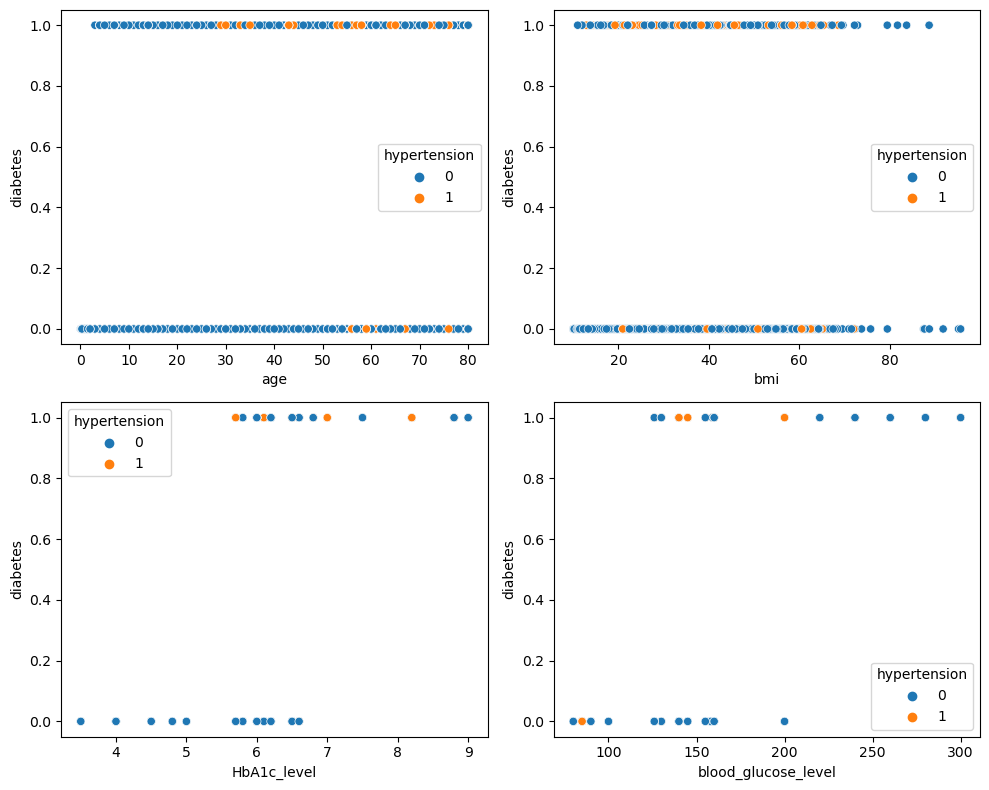

In [16]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
sns.scatterplot(data=d_eda,x='age',y='diabetes',hue=d_eda['hypertension'],ax=axes[0,0])
sns.scatterplot(data=d_eda,x='bmi',y='diabetes',hue=d_eda['hypertension'],ax=axes[0,1])
sns.scatterplot(data=d_eda,x='HbA1c_level',y='diabetes',hue=d_eda['hypertension'],ax=axes[1,0])
sns.scatterplot(data=d_eda,x='blood_glucose_level',y='diabetes',hue=d_eda['hypertension'],ax=axes[1,1])
plt.tight_layout()
plt.show()

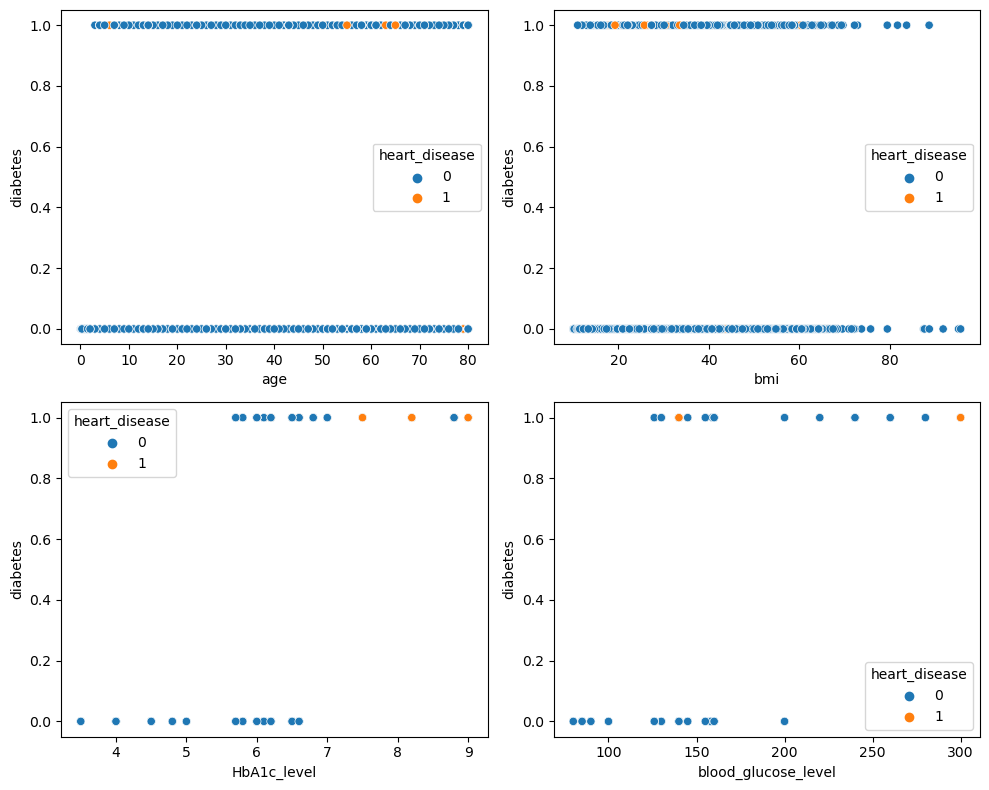

In [18]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
sns.scatterplot(data=d_eda,x='age',y='diabetes',hue=d_eda['heart_disease'],ax=axes[0,0])
sns.scatterplot(data=d_eda,x='bmi',y='diabetes',hue=d_eda['heart_disease'],ax=axes[0,1])
sns.scatterplot(data=d_eda,x='HbA1c_level',y='diabetes',hue=d_eda['heart_disease'],ax=axes[1,0])
sns.scatterplot(data=d_eda,x='blood_glucose_level',y='diabetes',hue=d_eda['heart_disease'],ax=axes[1,1])
plt.tight_layout()
plt.show()


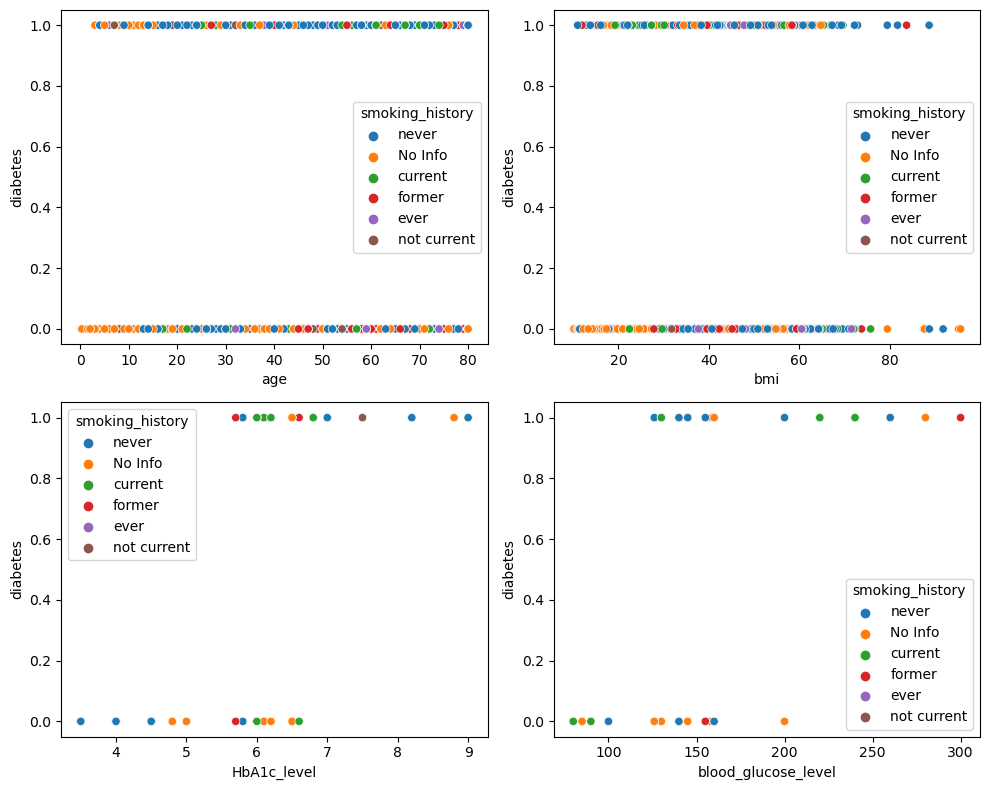

In [19]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
sns.scatterplot(data=d_eda,x='age',y='diabetes',hue=d_eda['smoking_history'],ax=axes[0,0])
sns.scatterplot(data=d_eda,x='bmi',y='diabetes',hue=d_eda['smoking_history'],ax=axes[0,1])
sns.scatterplot(data=d_eda,x='HbA1c_level',y='diabetes',hue=d_eda['smoking_history'],ax=axes[1,0])
sns.scatterplot(data=d_eda,x='blood_glucose_level',y='diabetes',hue=d_eda['smoking_history'],ax=axes[1,1])
plt.tight_layout()
plt.show()

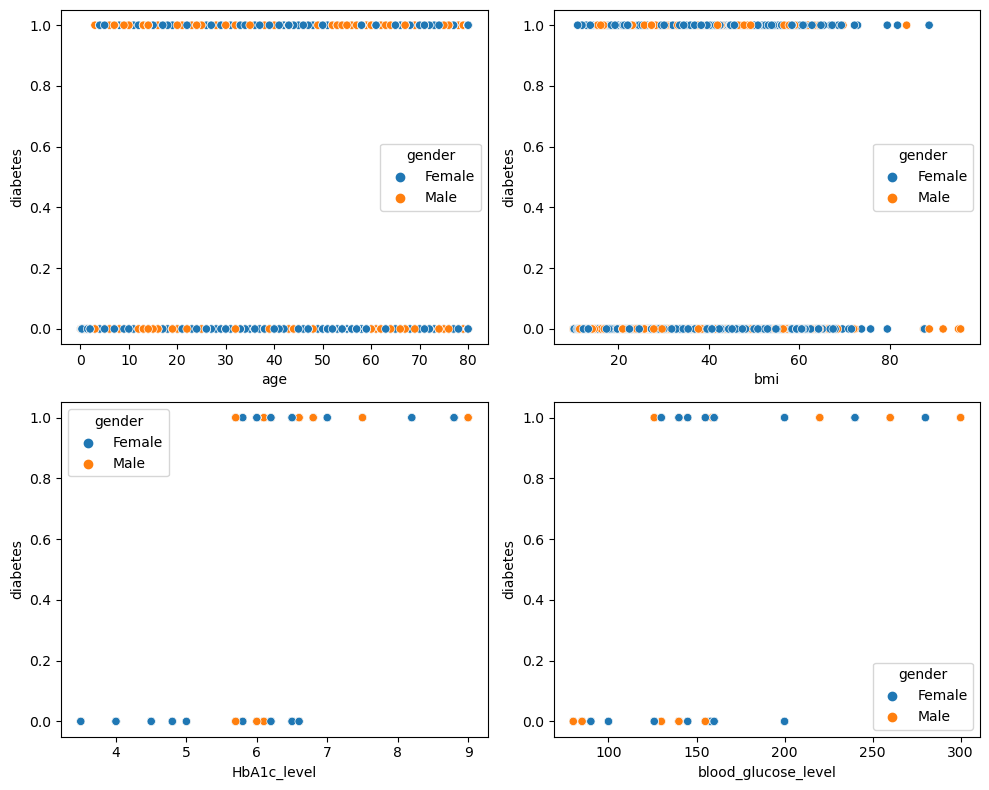

In [20]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
sns.scatterplot(data=d_eda,x='age',y='diabetes',hue=d_eda['gender'],ax=axes[0,0])
sns.scatterplot(data=d_eda,x='bmi',y='diabetes',hue=d_eda['gender'],ax=axes[0,1])
sns.scatterplot(data=d_eda,x='HbA1c_level',y='diabetes',hue=d_eda['gender'],ax=axes[1,0])
sns.scatterplot(data=d_eda,x='blood_glucose_level',y='diabetes',hue=d_eda['gender'],ax=axes[1,1])
plt.tight_layout()
plt.show()

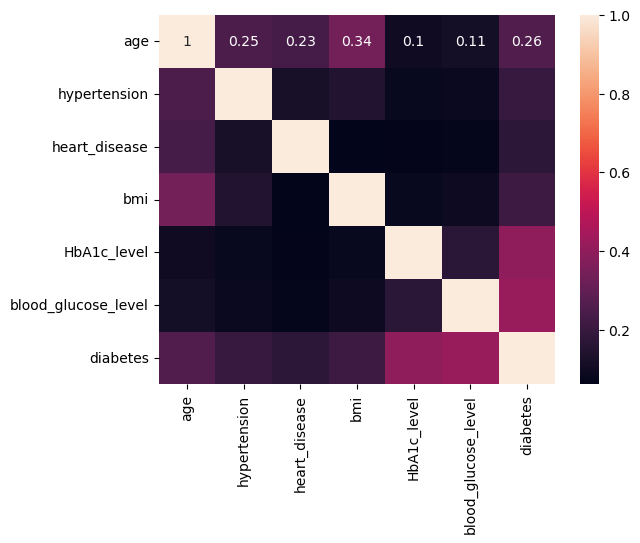

In [21]:
b_num = d_eda.drop(['gender','smoking_history'],axis=1)
corr_diab = b_num.corr()
sns.heatmap(corr_diab,annot=True)
plt.show()

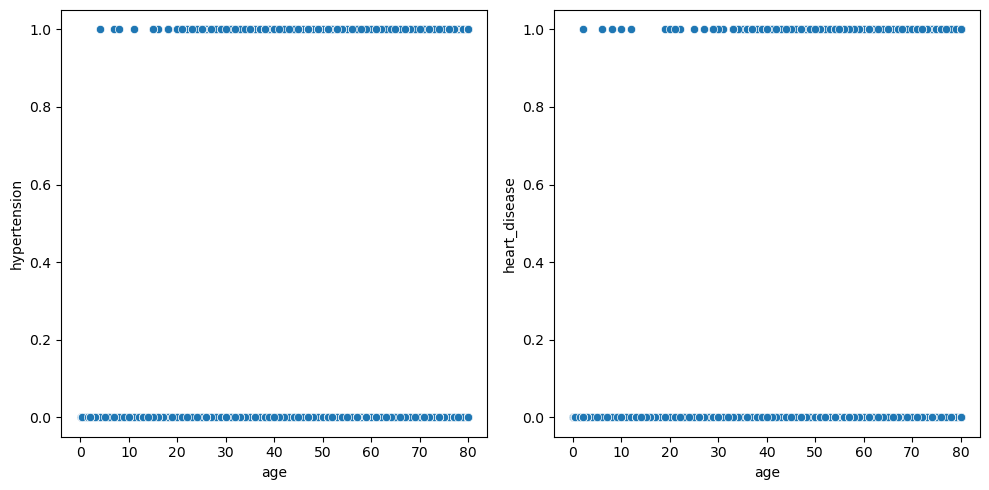

In [22]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=d_eda,x='age',y='hypertension',ax=axes[0])
sns.scatterplot(data=d_eda,x='age',y='heart_disease',ax=axes[1])
plt.tight_layout()
plt.show()

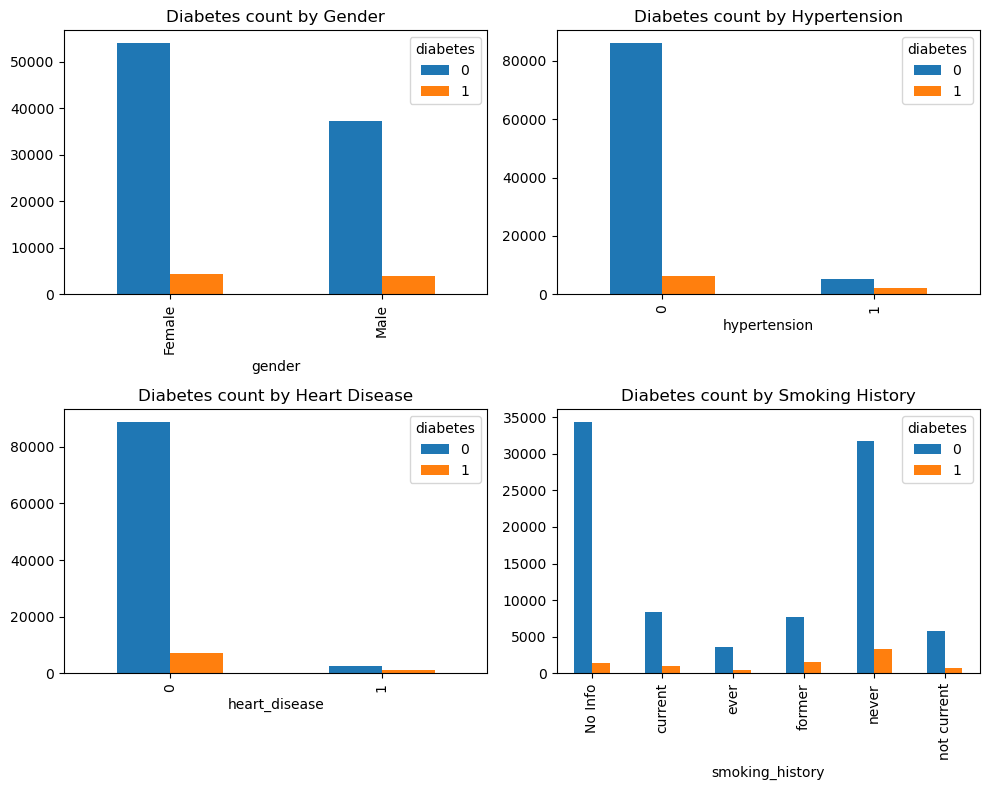

In [23]:
gender_g = d_eda.groupby(['gender','diabetes']).size().unstack()
hyper_g = d_eda.groupby(['hypertension','diabetes']).size().unstack()
heart_g = d_eda.groupby(['heart_disease','diabetes']).size().unstack()
smoke_g = d_eda.groupby(['smoking_history','diabetes']).size().unstack()
fig,axes = plt.subplots(2,2,figsize=(10,8))
gender_g.plot(kind='bar',ax=axes[0,0])
axes[0,0].set_title('Diabetes count by Gender')
hyper_g.plot(kind='bar',ax=axes[0,1])
axes[0,1].set_title('Diabetes count by Hypertension')
heart_g.plot(kind='bar',ax=axes[1,0])
axes[1,0].set_title('Diabetes count by Heart Disease')
smoke_g.plot(kind='bar',ax=axes[1,1])
axes[1,1].set_title('Diabetes count by Smoking History')
plt.tight_layout()
plt.show()


In [24]:
age_bins = [0,30,60,float('inf')]
age_labels = ['Young','Middle','Old']
glu_bins = [0,140,200,float('inf')]
glu_labels = ['Normal','Medium','High']
hba_bins = [0,5.7,6.4,float('inf')]
hba_labels = ['Normal','Medium','High']
d_eda['age_category'] = pd.cut(d_eda['age'],bins=age_bins,labels=age_labels)
d_eda['glu_category'] = pd.cut(d_eda['blood_glucose_level'],bins=glu_bins,labels=glu_labels)
d_eda['hba_category'] = pd.cut(d_eda['HbA1c_level'],bins=hba_bins,labels=hba_labels)
d_eda.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_category,glu_category,hba_category
0,Female,80.0,0,1,never,25.19,6.6,140,0,Old,Normal,High
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Middle,Normal,High
2,Male,28.0,0,0,never,27.32,5.7,158,0,Young,Medium,Normal
3,Female,36.0,0,0,current,23.45,5.0,155,0,Middle,Medium,Normal
4,Male,76.0,1,1,current,20.14,4.8,155,0,Old,Medium,Normal


In [25]:
d_pos = d_eda[d_eda.diabetes == 1]
d_pos.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_category,glu_category,hba_category
6,Female,44.0,0,0,never,19.31,6.5,200,1,Middle,Medium,High
26,Male,67.0,0,1,not current,27.32,6.5,200,1,Old,Medium,High
38,Male,50.0,1,0,current,27.32,5.7,260,1,Middle,High,Normal
40,Male,73.0,0,0,former,25.91,9.0,160,1,Old,Medium,High
53,Female,53.0,0,0,former,27.32,7.0,159,1,Middle,Medium,High


In [26]:
gender_group = d_pos.groupby(['gender']).size()
age_group = d_pos.groupby(['age_category']).size()
glu_group = d_pos.groupby(['glu_category']).size()
hba_group = d_pos.groupby(['hba_category']).size()

C:\Users\Himanshu Negi\AppData\Local\Temp\ipykernel_17916\3114741664.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = d_pos.groupby(['age_category']).size()
C:\Users\Himanshu Negi\AppData\Local\Temp\ipykernel_17916\3114741664.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  glu_group = d_pos.groupby(['glu_category']).size()
C:\Users\Himanshu Negi\AppData\Local\Temp\ipykernel_17916\3114741664.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fu

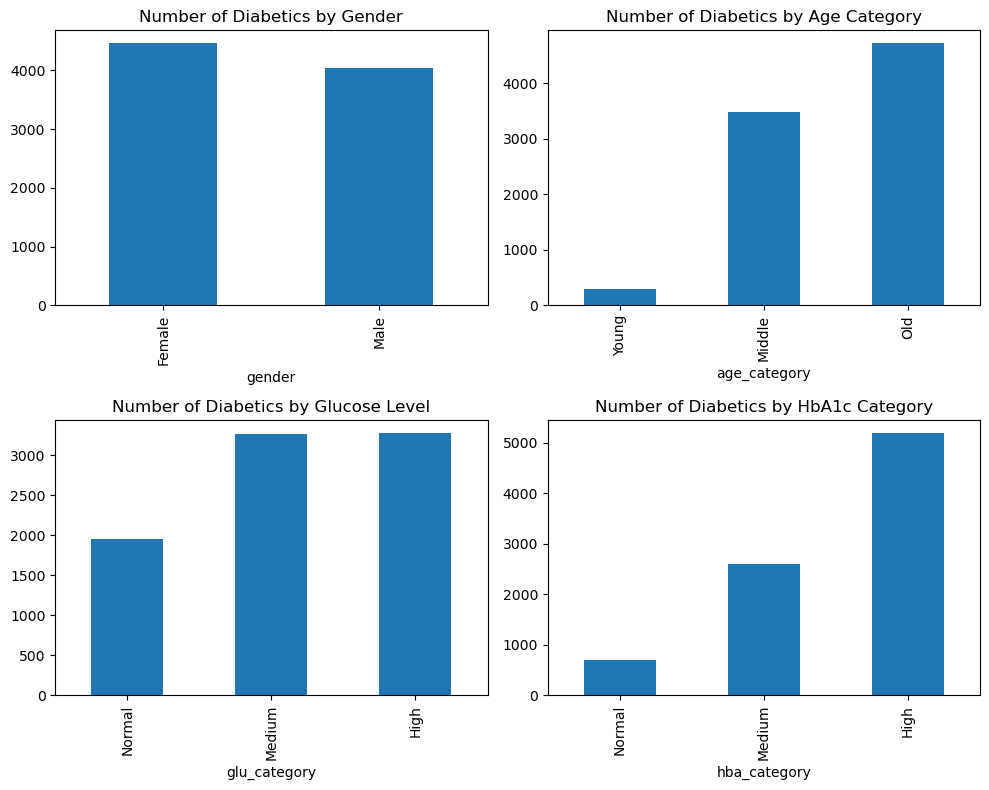

In [27]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
gender_group.plot(kind='bar',ax=axes[0,0])
axes[0,0].set_title('Number of Diabetics by Gender')
age_group.plot(kind='bar',ax=axes[0,1])
axes[0,1].set_title('Number of Diabetics by Age Category')
glu_group.plot(kind='bar',ax=axes[1,0])
axes[1,0].set_title('Number of Diabetics by Glucose Level')
hba_group.plot(kind='bar',ax=axes[1,1])
axes[1,1].set_title('Number of Diabetics by HbA1c Category')
plt.tight_layout()
plt.show()

In [28]:
non_diabetic = d_eda[d_eda.diabetes == 0]
non_diabetic.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_category,glu_category,hba_category
0,Female,80.0,0,1,never,25.19,6.6,140,0,Old,Normal,High
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Middle,Normal,High
2,Male,28.0,0,0,never,27.32,5.7,158,0,Young,Medium,Normal
3,Female,36.0,0,0,current,23.45,5.0,155,0,Middle,Medium,Normal
4,Male,76.0,1,1,current,20.14,4.8,155,0,Old,Medium,Normal


In [29]:
non_gender = non_diabetic.groupby(['gender']).size()
non_age = non_diabetic.groupby(['age_category']).size()
non_glu = non_diabetic.groupby(['glu_category']).size()
non_hba = non_diabetic.groupby(['hba_category']).size()

C:\Users\Himanshu Negi\AppData\Local\Temp\ipykernel_17916\772242707.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  non_age = non_diabetic.groupby(['age_category']).size()
C:\Users\Himanshu Negi\AppData\Local\Temp\ipykernel_17916\772242707.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  non_glu = non_diabetic.groupby(['glu_category']).size()
C:\Users\Himanshu Negi\AppData\Local\Temp\ipykernel_17916\772242707.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt

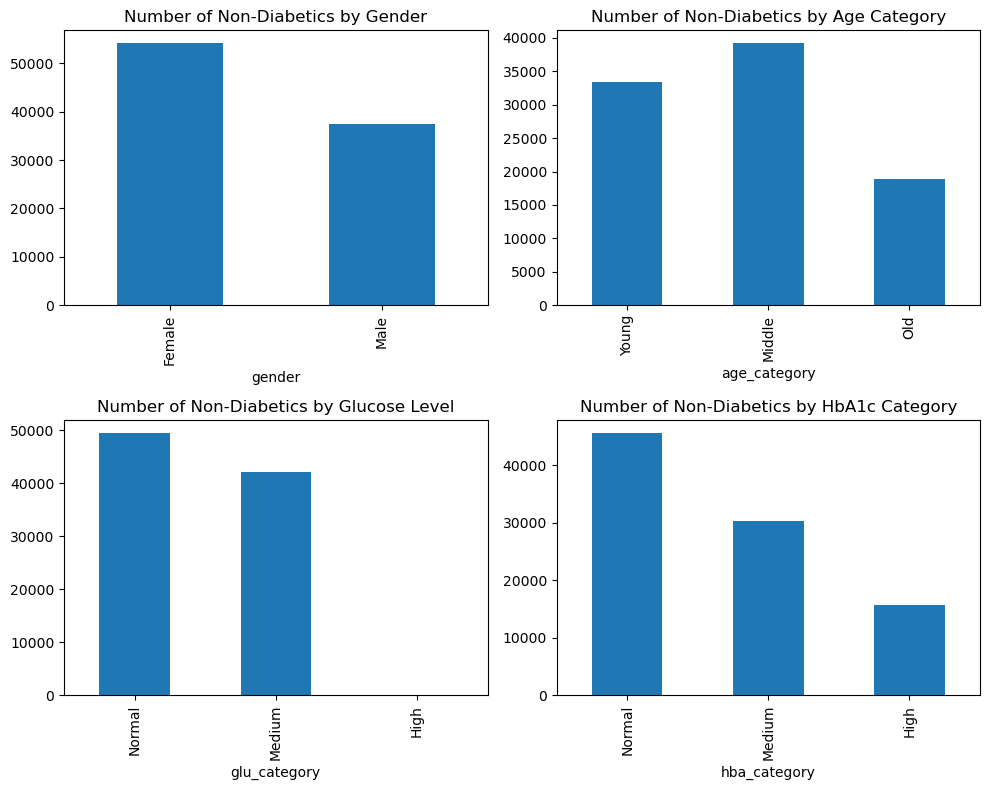

In [30]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
non_gender.plot(kind='bar',ax=axes[0,0])
axes[0,0].set_title('Number of Non-Diabetics by Gender')
non_age.plot(kind='bar',ax=axes[0,1])
axes[0,1].set_title('Number of Non-Diabetics by Age Category')
non_glu.plot(kind='bar',ax=axes[1,0])
axes[1,0].set_title('Number of Non-Diabetics by Glucose Level')
non_hba.plot(kind='bar',ax=axes[1,1])
axes[1,1].set_title('Number of Non-Diabetics by HbA1c Category')
plt.tight_layout()
plt.show()

In [31]:
grouped_diab = d_eda.groupby(['diabetes'])

In [32]:
mean_age = grouped_diab['age'].mean().round()
mean_glu = grouped_diab['blood_glucose_level'].mean().round()
mean_hba1 = grouped_diab['HbA1c_level'].mean().round()
mean_bmi = grouped_diab['bmi'].mean().round()

In [33]:
mean_age.index

Index([0, 1], dtype='int64', name='diabetes')

In [34]:
print('Mean age between Diabetics and Non-Diabetics:',mean_age)
print('Mean glucose level between Diabetics and Non-Diabetics:',mean_glu)
print('Mean HbA1c level between Diabetics and Non-Diabetics:',mean_hba1)
print('Mean BMI between Diabetics and Non-Diabetics:',mean_bmi)

Mean age between Diabetics and Non-Diabetics: diabetes
0    40.0
1    61.0
Name: age, dtype: float64
Mean glucose level between Diabetics and Non-Diabetics: diabetes
0    133.0
1    194.0
Name: blood_glucose_level, dtype: float64
Mean HbA1c level between Diabetics and Non-Diabetics: diabetes
0    5.0
1    7.0
Name: HbA1c_level, dtype: float64
Mean BMI between Diabetics and Non-Diabetics: diabetes
0    27.0
1    32.0
Name: bmi, dtype: float64


In [35]:
from sklearn.model_selection import train_test_split

diab_train,diab_test = train_test_split(diabetes,test_size=0.2,stratify = diabetes['diabetes'])

In [36]:
print('Shape of Training set:',diab_train.shape)
print('Shape of Test set:',diab_test.shape)

Shape of Training set: (79985, 9)
Shape of Test set: (19997, 9)


In [37]:
diab_labels = diab_train['diabetes'].copy()
diab_train.drop('diabetes',axis=1,inplace=True)

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())
num_attribs = ['age','bmi','HbA1c_level','blood_glucose_level']
cat_attribs = ['gender','hypertension','heart_disease','smoking_history']
preprocessing = ColumnTransformer([
    ('num',num_pipeline,num_attribs),('cat',cat_pipeline,cat_attribs)
])

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [41]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = make_pipeline(preprocessing,DecisionTreeClassifier(random_state=42))
tree_clf.fit(diab_train,diab_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'hypertension',
                                                   'heart_disease',
                                                   'smoking_history'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])